# Sparse Plane Array

疎な平配

In [2]:
Format[splarr[ruleLi_List]] := 
  With[
    {
      minPos = Min[#, 0] & /@ Min /@ Transpose[First /@ ruleLi], 
      maxPos = Max[#, 0] & /@ Max /@ Transpose[First /@ ruleLi]
    }, 
    With[{
      tbl = PadRight[
        Normal[
          SparseArray[(1 - minPos + #[[1]]) -> #[[2]] & /@ ruleLi]
        ], maxPos + 1 - minPos
      ]}, 
      Grid[
        Transpose[
          ReplacePart[tbl, 
            1 - minPos -> Item[
              Extract[tbl, 1 - minPos], Frame -> True
            ]
          ]
        ]
      ]
    ]
  ]

In [3]:
normal[splarr[{ruleSeq__Rule}]] := 
    splarr[Normal[Map[Plus @@ (Last /@ #) &, GroupBy[{ruleSeq}, First]]]]

In [4]:
Unprotect[Plus];
Plus[splarr[ruleLi1_List], splarr[ruleLi2_List]] := 
    normal[splarr[Join[ruleLi1, ruleLi2]]]
Plus[sa1_splarr, b_] := Plus[sa1, splarr[{{0, 0} -> b}]]
Protect[Plus];

In [8]:
convApply[f_, li_List, val_] := f[#, val] & /@ li
convApply[f_, li1_List, li2_List] := convApply[f, li1, #] & /@ li2

Unprotect[Times];
Times[splarr[ruleLi1_List], splarr[ruleLi2_List]] := 
    normal[splarr[
        Join @@ convApply[
            (#1[[1]] + #2[[1]]) -> (#1[[2]] #2[[2]]) &, ruleLi1, ruleLi2
        ]
    ]]
Times[sa1_splarr, b_] := Times[sa1, splarr[{{0, 0} -> b}]]
Protect[Times];

In [14]:
Unprotect[Power];
Power[a_splarr, b_?Positive] := normal[Fold[Times, Table[a, b]]]
Protect[Power];

Item[11, Frame -> True]   0   0   1

7                         0   0   0

0                         0   0   0

5                         0   0   0
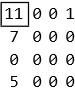

In [22]:
splarr[{
    {0, 0} -> 3,
    {0, 1} -> 7
}] + splarr[{
    {0, 0} -> 8,
    {3, 0} -> 1,
    {0, 3} -> 5
}]

1   Item[2, Frame -> True]   1

1   1                        0
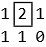

In [18]:
splarr[{
    {0, 0} -> 1,
    {1, 0} -> 1,
    {0, 1} -> 1
}] splarr[{
    {0, 0} -> 1,
    {-1, 0} -> 1
}]